Student Name:  Sue Mir

Cohort: Data Science / Part Time October/19

Blog post url: 

Video url:

# BOOKMARKS
### [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# Project Description and Approach

Description:
    
To perform regression analysis on the subset of KC Housing Data in order to find a positive linear relationship
between house price and selected predictor values explored and discovered in the regression analysis.

To present the findings to a non-technical audience within a given timeframe of 5 minutes that is clear and
informative, representative of the interest of this audience which is 
'What factors from the findings in this analysis influence the increase in House Price?'

Approach:
To obtain the data, view it and decide:
Which values need data cleaning that have unusual values and are not numeric data types and how to clean that data/convert the data types so that not only they are representative of the data but also are numerical in order to be processed easily by the regression algorithm.

To perform EDA on the data in order to find relationships in the data and normalization patterns that may require further cleaning in order to normalise.

To build a regression model in order to find the best fit predictor values with the lowest kurtosis, skew and R2 value, the highest linearity to the regression line, (the least variance).

To analyse the regression model results and further perform train testing on the model.

To be able to present answers to the non technical on which predictors had a positive influence on House Prices and why.


# OBTAIN


#----------------------------------------------------------------------------------
#------------ Initialise and load libraries
#----------------------------------------------------------------------------------

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy import stats
    
#------------Stop the deprecation warning from popping up
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#----------------------------------------------------------------------------------
#------------ Load the data and display general summary of data
#----------------------------------------------------------------------------------

In [79]:
#------------Read the data file into pandas datafile object
pd.set_option('display.max_columns', 21)
df = pd.read_csv('kc_house_data.csv')
display(df.head())  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [80]:
#------------Display general overview of the data
#Data Initial Overview - Display info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [81]:
#Data Initial Overview - Display first 5 rows
display(df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [82]:
#Data Initial Overview - Display last 5 rows
display(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [83]:
#Data Initial Overview - Display a sample of 20 rows
display(df.sample(20))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13741,3298200620,7/14/2014,358000.0,3,1.00,940,6695,1.0,0.0,0.0,4,6,940,0.0,1959,0.0,98008,47.6195,-122.120,1230,7400
17319,3630000130,10/28/2014,430000.0,3,2.25,1470,1703,2.0,0.0,0.0,3,8,1470,0.0,2005,NaN,98029,47.5478,-121.999,1380,1107
15077,9169100130,10/7/2014,502000.0,2,1.00,1570,4704,1.5,0.0,1.0,3,8,1570,0.0,1931,0.0,98136,47.5256,-122.392,1820,4704
9457,6169901006,7/15/2014,600000.0,2,1.00,1180,2160,1.0,0.0,1.0,3,7,940,240.0,1909,0.0,98119,47.6313,-122.368,2700,5400
4898,4331400190,11/12/2014,259950.0,3,1.50,1240,9500,1.0,0.0,0.0,4,7,1240,0.0,1955,0.0,98166,47.4756,-122.350,1845,10125
1648,9353300140,6/18/2014,284950.0,3,1.00,990,10723,1.0,0.0,0.0,5,7,990,0.0,1960,0.0,98059,47.4887,-122.133,1460,10723
3847,7131300025,5/21/2014,210000.0,3,1.00,1240,4842,1.0,NaN,0.0,4,6,1240,0.0,1916,0.0,98118,47.5166,-122.269,1540,5110
17280,5126310470,1/15/2015,515500.0,4,2.75,2830,8126,2.0,0.0,0.0,3,8,2830,0.0,2005,NaN,98059,47.4863,-122.140,2830,7916
1732,913000340,1/2/2015,252000.0,1,1.00,680,1638,1.0,NaN,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
15694,3250500103,4/8/2015,925000.0,3,1.75,1610,10796,1.0,0.0,0.0,3,7,1070,540.0,1951,0.0,98004,47.6272,-122.208,1940,10796


In [84]:
#Data Initial Overview - Table dimensions
df.shape

(21597, 21)

In [85]:
#------------ Display general statistics of each column')
np.round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [86]:
#------------Check for columns with nulls
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [87]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# SCRUB

#################################  SCRUB ITERATION 1   #################################

Scrub nulls and object datatypes
#----------------------------------------------------------------------------------
#------------ Decide on what to do with the Nulls and Unusual Datatypes
#----------------------------------------------------------------------------------

In [88]:
# [waterfront] has 2376/21597 (11%) null values 
# waterfront is nominal categorical
df['waterfront'].isnull().sum()
# replace NaN with the mean value = 0
df['waterfront'].fillna(0,inplace=True)
# waterfront is to be turned into a numeric value and observed as boolean(has waterfront 1=True, 0 = False) 
#as values show only 1 or 0
df['waterfront'].value_counts()
# 0.0    19075
# 1.0      146
# Name: waterfront, dtype: int64
# df['waterfront'] = df['waterfront'].astype('bool') - pandas needs numeric values to plot
df['waterfront'] = pd.to_numeric(df['waterfront'])

In [89]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [90]:
# [view] has a small amount of null values
# view is nominal categorical
df['view'].isnull().sum()
#63
df['view'].value_counts()
#0.0    19422
#2.0      957
#3.0      508
#1.0      330
#4.0      317
#Name: view, dtype: int64
#Only a small amount of nulls, replace NaN with 0
df['view'].fillna(0,inplace=True)
#view has far too many 0’s compared to all other values making it heavily skewed.  
# drop view column
df = df.drop(["view"], axis=1)
# df.view.astype(bool).value_counts().plot(kind='bar');

In [91]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [92]:
# [yr_renovated] has 3842/21597 (17.78%) null values
df['yr_renovated'].isnull().sum()
#3842
#how many different values does it have?  it has many zeros
df['yr_renovated'].value_counts().head()
#0.0       17011
#2014.0       73
#2003.0       31
#2013.0       31
#2007.0       30
df = df.drop(["yr_renovated"], axis=1)

In [93]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [94]:
# check if [id column] has unique values
id_list = df['id'].unique().tolist()
len(id_list)
#21420 out of 21597 values are unique
#bin id column as it is not linear or has any linear/numerical relationship
df = df.drop(["id"], axis=1)


#----------------------------------------------------------------------------------
#------------ Check potential categoricals - Scrub nulls and object datatypes
#----------------------------------------------------------------------------------

In [95]:
# check [zipcode] column - number of unique values to consider binning
zipcode_list = df['zipcode'].unique().tolist()
# zipcode is nominal categorical
len(zipcode_list)
#70 out of 21597 values are unique

70

In [96]:
# check unique values for [yr_built] column for number of unique values
# yr_built_list is ordinal categorical
yr_built_list = df['yr_built'].unique().tolist()
len(yr_built_list)  #116
min(yr_built_list) #1900
max(yr_built_list) #2015

2015

In [97]:
# check unique values for [sqft_basement] column for number of unique values
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304  
# view the values as only small list
sqft_basement_list
# there are odd values including '?' and, check the number of '?' and 0 values
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304   
# check how many '?' and '0' value counts
check_values_sqft_basement_list = df['sqft_basement']
qmark_count = 0
zero_count = 0
sum_total = 0
for item in  check_values_sqft_basement_list:
    if item == '?':
        qmark_count += 1
    elif item == '0.0':
        zero_count +=1
    else:
        sum_total += float(item)

zero_count   #12826 
qmark_count  #454

# convert the values with '?' to the mean
mean_sqft_basement = (sum_total / len(check_values_sqft_basement_list)) #2015

In [98]:
#------------Decide on what to do with unusual datatypes like object data types
# [sqft_basement] convert the values with '?' to mean value
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = mean_sqft_basement
# check unique value list for sqft_basement to check '?' are converted
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304  
# view the values as its only a small list
sqft_basement_list
# convert datatype of sqft_basement safely to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [100]:
type(df['date'])
#[Date] object data type converted into datetime
df['date'] = pd.to_datetime(df['date'])
#double check everything looks right
df['date'].head()
# query the data type for date column
type(df['date'][0]) #pandas._libs.tslibs.timestamps.Timestamp

#Question of Interest:  What sales dates does this data cover?
df['date'].min()    #Timestamp('2014-05-02 00:00:00')
df['date'].max()    #Timestamp('2015-05-27 00:00:00')

Timestamp('2015-05-27 00:00:00')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(10)
memory usage: 3.0 MB



#----------------------------------------------------------------------------------
#------------ Bin Categoricals, encode and get dummys
#----------------------------------------------------------------------------------

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,"ZIP_(98033, 98065]","ZIP_(98065, 98118]","ZIP_(98118, 98199]"
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,0,0,1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,0,0,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,0,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,0,1,0


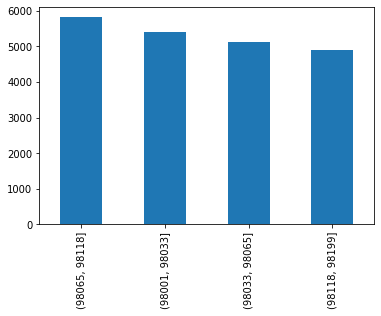

In [102]:
#Bin Categoricals - [zipcode]
#df['zipcode'].describe()
# First, create bins based on the values observed. 5 values will result in 4 bins
zipbins = [98001, 98033, 98065, 98118, 98199]

# Use pd.cut()
bins_zip = pd.cut(df['zipcode'], zipbins)

# # Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_zip = bins_zip.cat.as_ordered()
bins_zip.head()
# Check if the result is balanced
bins_zip.value_counts().plot(kind='bar');

# Inspect the result
#bins_zip.value_counts().plot(kind='bar')

# Replace the existing 'zipcode' column
df['zipcode']=bins_zip

#Perform label encoding
df['zipcode'] = df['zipcode'].cat.codes

zipcode_dummy = pd.get_dummies(bins_zip, prefix='ZIP', drop_first=True)
df = df.drop(['zipcode'], axis=1)

df = pd.concat([df, zipcode_dummy], axis=1)
df.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,"ZIP_(98033, 98065]","ZIP_(98065, 98118]","ZIP_(98118, 98199]","YRBLT_(1951, 1975]","YRBLT_(1975, 1997]","YRBLT_(1997, 2015]"
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,47.5112,-122.257,1340,5650,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,47.7210,-122.319,1690,7639,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,47.5208,-122.393,1360,5000,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,47.6168,-122.045,1800,7503,0,1,0,0,1,0


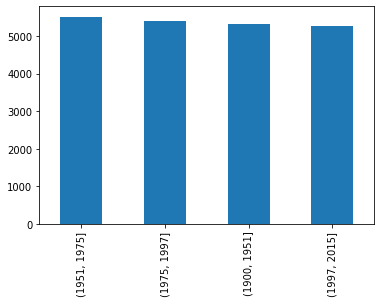

In [103]:
#Bin Categoricals - yr_built
#check value range for yr_built
# check unique values for [sqft_basement] column for number of unique values
yr_built_list = df['yr_built'].unique().tolist()
yr_built_list #1900 - 2015
df['yr_built'].describe()
# first, create bins based on the values observed. 
bins = [1900, 1951, 1975, 1997, 2015]
# use pd.cut to create variable to store bins
bins_year = pd.cut(df['yr_built'], bins)
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_year = bins_year.cat.as_unordered()
bins_year.head()
# Check if the result is balanced
bins_year.value_counts().plot(kind='bar');
# replace the existing "yr_built" column
df['yr_built']=bins_year
#Perform label encoding
df['yr_built'] = df['yr_built'].cat.codes

yrbuilt_dummy = pd.get_dummies(bins_year, prefix='YRBLT', drop_first=True)
df = df.drop(['yr_built'], axis=1)

df = pd.concat([df, yrbuilt_dummy], axis=1)
df.head()

In [104]:
#Rename hot encoded names as the automatic names may cause errors when regression modelling on these columns
df = df.rename(columns = {"YRBLT_(1951, 1975]": "YRBLT_1951_1975"}) 
df = df.rename(columns = {"YRBLT_(1975, 1997]": "YRBLT_1975_1997"}) 
df = df.rename(columns = {"YRBLT_(1997, 2015]": "YRBLT_1997_2015"}) 
df = df.rename(columns = {"ZIP_(98033, 98065]": "ZIP_98033_98065"}) 
df = df.rename(columns = {"ZIP_(98065, 98118]": "ZIP_98065_98118"})  
df = df.rename(columns = {"ZIP_(98118, 98199]": "ZIP_98118_98199"}) 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,47.5112,-122.257,1340,5650,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,47.7210,-122.319,1690,7639,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,47.5208,-122.393,1360,5000,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,47.6168,-122.045,1800,7503,0,1,0,0,1,0


#################################  SCRUB ITERATION 2   
-------------------------------To be run after EDA further in Explore

In [105]:
#----------------------------------------------------------------------------------
#------------ Drop columns from multicollinearity results
#------------ Scrub Iteration 2 To be run after Explore
#---------------------------------------------------------------------------------- 
#drop features that correlate greater than 0.75 one at a time, starting from the greatest. 
#Check multicollinearity again, then drop the next highest until none are greater than 0.75 to one another.
df = df.drop(["sqft_lot"], axis=1)
df = df.drop(["sqft_lot15"], axis=1)
df = df.drop(["sqft_living15"], axis=1)
df = df.drop(["sqft_above"], axis=1)
df = df.drop(["sqft_basement"], axis=1)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,2014-10-13,221900.0,3,1.00,1180,1.0,0.0,3,7,47.5112,-122.257,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,2.0,0.0,3,7,47.7210,-122.319,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,1.0,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,1.0,0.0,5,7,47.5208,-122.393,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,1.0,0.0,3,8,47.6168,-122.045,0,1,0,0,1,0


In [106]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.006760,3.409825,7.657915,47.560093,-122.213982,0.236838,0.269111,0.226883,0.255360,0.250544,0.24346
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.081944,0.650546,1.173200,0.138552,0.140724,0.425152,0.443508,0.418826,0.436073,0.433336,0.42918
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,1.000000,3.000000,47.155900,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,3.000000,7.000000,47.471100,-122.328000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,47.571800,-122.231000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,47.678000,-122.125000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,47.777600,-121.315000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [107]:
#----------------------------------------------------------------------------------
#------------Drop more categoricals (at discretion) - look like vertical lines on scatter plots
#------------Scrub Iteration 2 - To be run after Explore
#---------------------------------------------------------------------------------- 

df = df.drop(["condition"], axis=1)   #there is no numerical order to condition and no relationship with target
df = df.drop(["floors"], axis=1)
df = df.drop(["date"], axis=1)
#drop date as it is non numeric - use later for interesting data analysis but drop for modelling for the moment
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,3,1.00,1180,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,3,2.25,2570,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,2,1.00,770,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,4,3.00,1960,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,3,2.00,1680,0.0,8,47.6168,-122.045,0,1,0,0,1,0


In [108]:
def scrub_find_remove_outliers(column): 
    """Use scipy to calcualte absolute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    #----------------------------------------------------------------------------------
    #------------ Remove outliers - values outside the min / max of the box plot 
    #------------ Scrub Iteration 2 - To be run after Explore
    #---------------------------------------------------------------------------------- 
    
    from scipy import stats
    z = np.abs(stats.zscore(column))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=column.index)

df2 = df.copy()

for column in df.columns:

    idx = scrub_find_remove_outliers(df[column])
    idx
    #     display(df.loc[idx==True].describe().round(3))
    #     display(df.loc[idx==False].describe().round(3))
    df = df.loc[idx==False]

In [109]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.033100e+04,20331.000000,20331.000000,20331.000000,20331.0,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000
mean,4.930752e+05,3.329153,2.052248,1977.655551,0.0,7.544882,47.559305,-122.220640,0.228715,0.272195,0.233338,0.262899,0.245487,0.236437
std,2.410595e+05,0.856769,0.692595,751.159560,0.0,1.009444,0.140548,0.131662,0.420015,0.445101,0.422966,0.440219,0.430386,0.424904
min,7.800000e+04,1.000000,0.500000,370.000000,0.0,5.000000,47.159300,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.170000e+05,3.000000,1.500000,1410.000000,0.0,7.000000,47.465500,-122.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,0.0,7.000000,47.571500,-122.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.130000e+05,4.000000,2.500000,2449.000000,0.0,8.000000,47.679700,-122.131000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4460.000000,0.0,10.000000,47.777600,-121.792000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
#----------------------------------------------------------------------------------
#----------- Remove outliers - values outside z score (>3)
#------------ Scrub Iteration 2 - To be run after Explore
#---------------------------------------------------------------------------------- 
# z = np.abs(stats.zscore(df))
# print(z)

# threshold = 3
# print(np.where(z > 3))

In [111]:
#df = df[(z < 3).all(axis=1)]
#remove outliers according to z score - this seems to delete all the rows in the df so don't run!
#df.describe()

In [112]:
#----------------------------------------------------------------------------------
#------------ Scrub Log Transform numerical columns
#------------ Scrub Iteration 2 - To be run after Explore and after removal of outliers
#---------------------------------------------------------------------------------- 

df2 = df.copy() #backup df
# Normalize Values with log transform and feature scaling')
# Create a pandas dataframe to store normalized values
df_before_log = df 
df_log= pd.DataFrame([])
#log transform each of the values.  
df_log["sqft_living"] = np.log(df["sqft_living"])
#graph the results to verify normalization
#df_log.hist(figsize  = [6, 6]);
#store normalized values into vars
log_sqft_living = df_log["sqft_living"]
#use min/max scaling to standardize values between 0 and 1
df["sqft_living"] = (log_sqft_living-min(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))

#------------ Standardize remaining columns

#assign each column to variable for easier access
bedrm = df["bedrooms"]
bathrm = df["bathrooms"]
df["bedrooms"] = (bedrm-np.mean(bedrm))/np.sqrt(np.var(bedrm))
df["bathrooms"] = (bathrm-np.mean(bathrm))/np.sqrt(np.var(bathrm))
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,-0.384188,-1.519320,0.465882,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,-0.384188,0.285530,0.778564,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,-1.551392,-1.519320,0.294403,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,0.783016,1.368441,0.669718,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,-0.384188,-0.075440,0.607795,0.0,8,47.6168,-122.045,0,1,0,0,1,0


In [113]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.033100e+04,2.033100e+04,2.033100e+04,20331.000000,20331.0,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000
mean,4.930752e+05,-8.004789e-16,3.686829e-15,0.643692,0.0,7.544882,47.559305,-122.220640,0.228715,0.272195,0.233338,0.262899,0.245487,0.236437
std,2.410595e+05,1.000025e+00,1.000025e+00,0.157116,0.0,1.009444,0.140548,0.131662,0.420015,0.445101,0.422966,0.440219,0.430386,0.424904
min,7.800000e+04,-2.718596e+00,-2.241260e+00,0.000000,0.0,5.000000,47.159300,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.170000e+05,-3.841881e-01,-7.973796e-01,0.537415,0.0,7.000000,47.465500,-122.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,-3.841881e-01,2.855305e-01,0.650836,0.0,7.000000,47.571500,-122.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.130000e+05,7.830159e-01,6.465005e-01,0.759191,0.0,8.000000,47.679700,-122.131000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.640000e+06,3.117424e+00,3.173291e+00,1.000000,0.0,10.000000,47.777600,-121.792000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# log transform seems to convert back to NaN in waterfront
# replace NaN with the mean value = 0
# df['waterfront'].fillna(0,inplace=True)
# # waterfront is to be turned into a numeric value and observed as boolean(has waterfront 1=True, 0 = False) 
# #as values show only 1 or 0
# df['waterfront'].value_counts()
# df['waterfront'].isnull().sum()

# Scrub Observations

#----------------------------------------------------------------------------------
#------------ OBSERVATIONS - Scrub nulls and object datatypes
#----------------------------------------------------------------------------------

COLUMNS
-----Dropped columns
view - dropped - has far too many 0’s compared to all other values in the column making it heavily skewed. 

yr_renovated - dropped - how many different values does it have?  it has many zeros
df['yr_renovated'].value_counts().head()

id - dropped -  as it is not linear or has any linear/numerical relationship

date - has object data type, converted to date date type, keep for potential interesting reports for non technical
presentation, do not include in models or graphs as it is non numerical and will error. delete

yr_built - kept - consider using for extra interesting reports for non technical presentation.  delete for model

------Keep columns
waterfront - kept - is to be turned into a numeric value and observed as boolean(has waterfront 1=True, 0 = False) as values show only 1 or 0

zipcode - kept - consider categorising and hot encoding as has 70 / 21597 unique values


Scrub column data further
sqft_basement - has unusual data including a '?', is of object type.  Need to convert '?', nulls and datatype to numeric

    
GENERAL OVERVIEW SO FAR
    
Remaining columns to keep on regression modeling on that are not dropped:
waterfront, zipcode, yr_built, sqft_basement, sqft_living, lat, long, bedrooms, bathrooms

Remaining columns to keep for consideration of interesting reports for non technical:
date, yr_built

-----Remove outliers
All coloumns were checked for outliers outside of boxplot min/max and trimmed off

# EXPLORE

In [115]:
#----------------------------------------------------------------------------------
#------------ Display predictor and target relationships and predictor normalization graphs
#----------------------------------------------------------------------------------

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


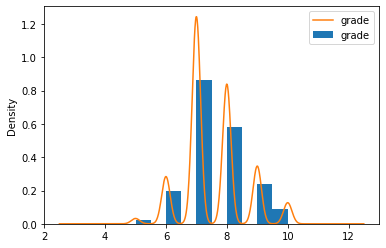

In [116]:
def explore_normality_hist_kde(column):
    """ Display hist and kde graphs for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check normality through hist and kde plots of the predictor column
    #----------------------------------------------------------------------------------
    df[column].plot.hist(normed=True, label =column)
    df[column].plot.kde(label =column)
    plt.legend()
    plt.show()
    
# for column in df:
#     explore_normality_hist_kde(column)
explore_normality_hist_kde('grade')

Explore Normality
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------

Question:  Which variables are easiest to further normalise?
Columns with Long Tails on both side and have less skew to one side, potentially have closer to a bell curve - attempt to remove outliers and normalise
bedrooms
bathrooms
sqft_living
grade
sqft_above
long
lat
sqft_living_15

Question:  Which variables are difficult to further normalise?
Columns with Long Tails and difficult to continue to normalise - potentially drop column
sqft_lot15, sqft_basement  They are skewed towards one side of the graph.

Question:  Which variables are potentially categories?
floors, waterfront (very long tails), condition (very long tails)

Question:  Which variables can be hot encoded to normalise in groups?
Potential categorical columnss, look at their description (mean, max, min) and normalize accordingly around these
description values
Columns that are binned
zip, yr_built

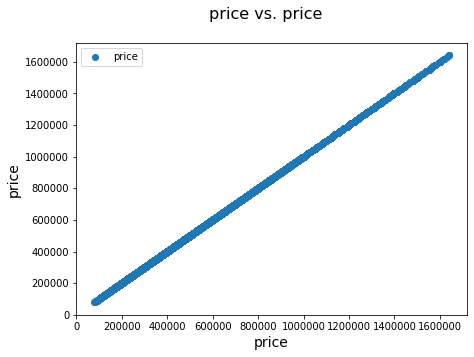

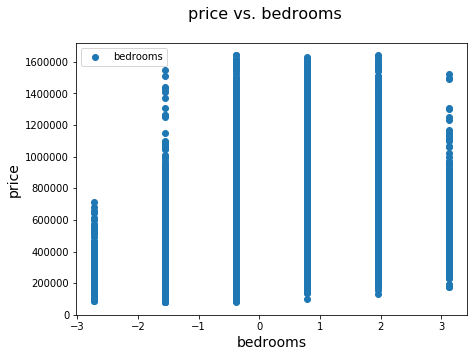

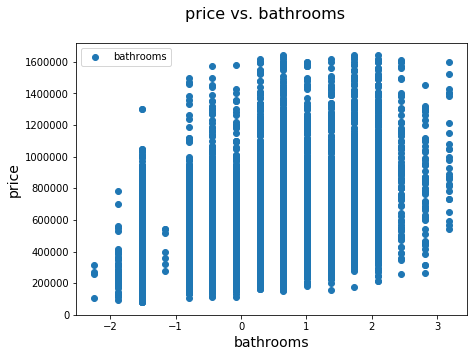

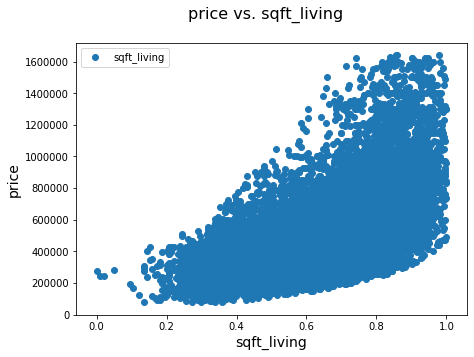

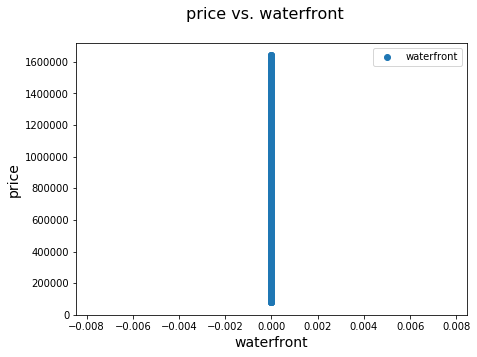

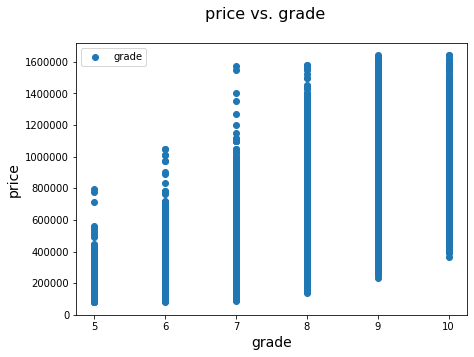

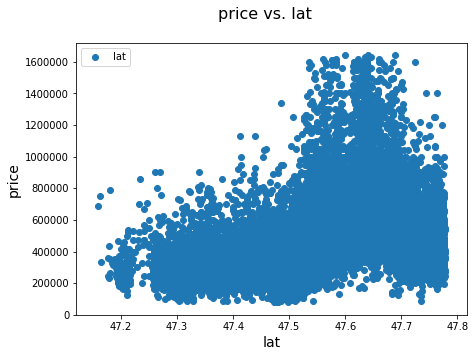

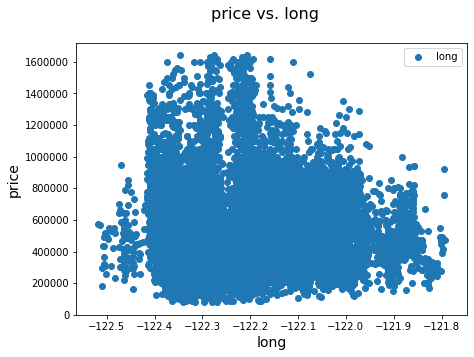

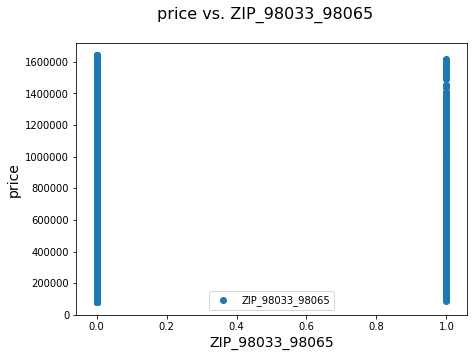

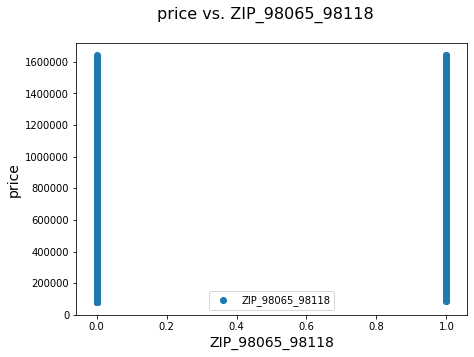

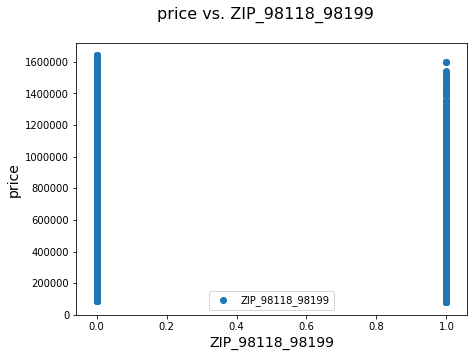

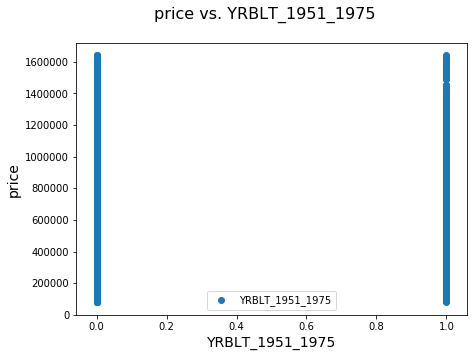

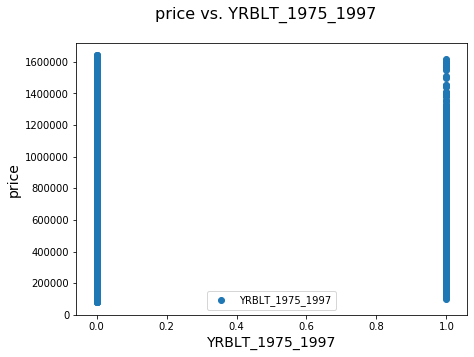

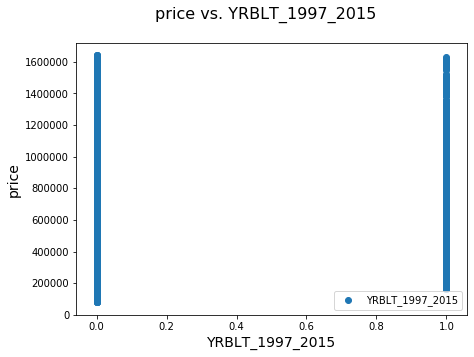

In [117]:
def explore_relationship_target_predictor(column):
    """ Display scatterplot with relationship between column and target price
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check relationship of predictor to target column
    #----------------------------------------------------------------------------------
    #With scatter plot
    fig = plt.figure(figsize=(7, 5))
    fig.suptitle('price vs. ' + column, fontsize=16)
    plt.scatter(df[column], df['price'], label=column)
    plt.legend()
    plt.xlabel(column, fontsize=14)
    plt.ylabel('price', fontsize=14)
    plt.show()

for column in df:
    explore_relationship_target_predictor(column)

Explore Relationship between Target and Predictor
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------

Question: Which variables are potential categories?
columns which have vertical relationship with target - potentially categories - drop these columns
floors, condition, waterfront  The columns like floors and condition that don't display a relationship further in the qq or scatter plots are to be dropped.

columns which have vertical relationship with target - potentially categories - keep out of further interest
zip  (binned, hot encoded)
yr_built (binned, hot encoded)

columns which have vertical linear relationship with target - potentially categories - keep these columns for further exploring
grade

Question:  Which variables have little or no relationship with target?
Columns that do not show a positive direction of growth in y value (target)
columns which have a little or no relationship (est 4/10) with target - drop these columns
sqft_lot
long


Question:  Which variables have little or more relationship with target?
Columns that show a positive direction of growth in y value (target)
columns which have a slight relationship (est 4/10) with target
bedrooms
sqft_basement
lat


columns which have a slighter stronger relationship (est 6/10) with target
bathrooms


columns which have a slighter stronger relationship (est 8/10) with target
sqft_living
sqft_above


/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


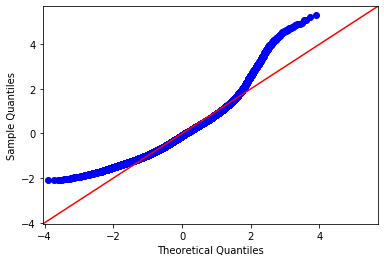

In [118]:
def explore_normality_qqplots(column):
    """ Display qq plot for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check the normality assumptions by creating a QQ-plot
    #---------------------------------------------------------------------------------- 
    import scipy.stats as stats
    f = 'price~' + column
    #print('qqplot for ' + f)
    model = smf.ols(formula=f, data=df).fit()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig.show()

# for column in df:
#     if column != 'date':
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('sqft_living')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


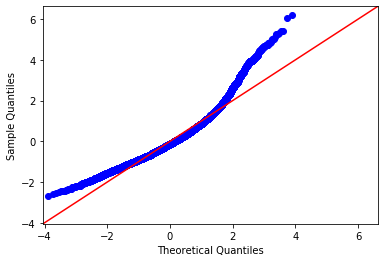

In [119]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('grade')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


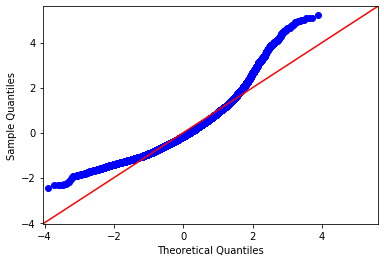

In [120]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('bathrooms')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


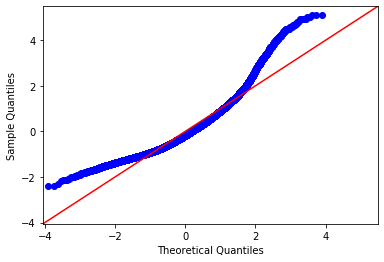

In [121]:
explore_normality_qqplots('bedrooms')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


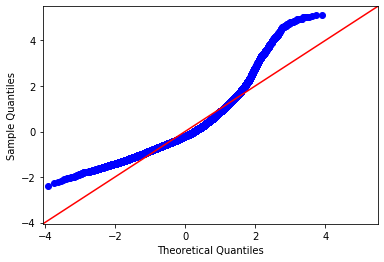

In [122]:
explore_normality_qqplots('lat')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


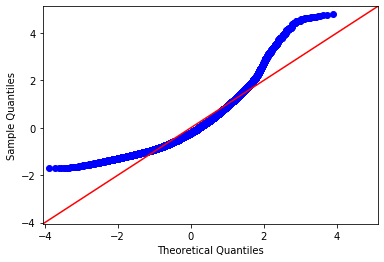

In [123]:
explore_normality_qqplots('long')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


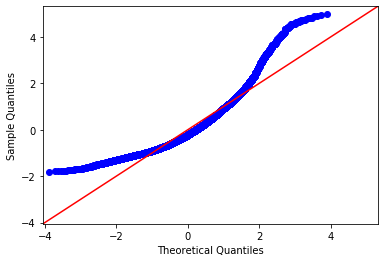

In [124]:
explore_normality_qqplots('YRBLT_1951_1975')

Explore Normality Assumptions with QQ Plots
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------
Question:  Which variables have a better relationship with target?
Those variable is qq plot which show a closer relationship to the regression line.  As they skew away from the regression line, the variance and standard deviation becomes larger.

After removing outliers outside the min and max of the boxplots of these values, standardising them through log and min/max standardistion the relationships still show variance on both tails of the qq plots. There is room to further normalise the predictor variables.

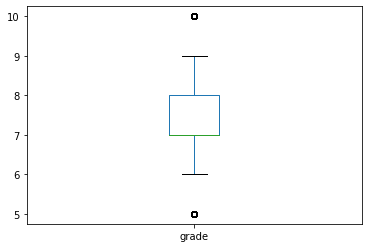

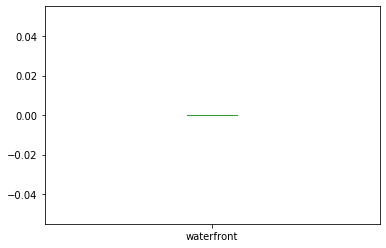

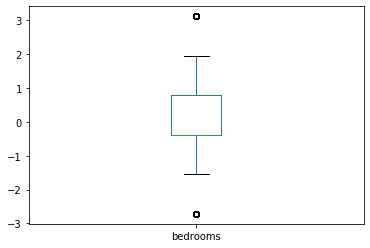

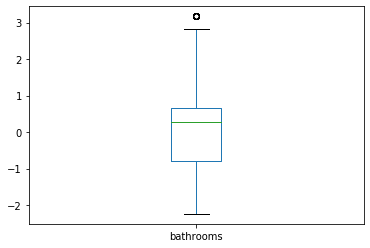

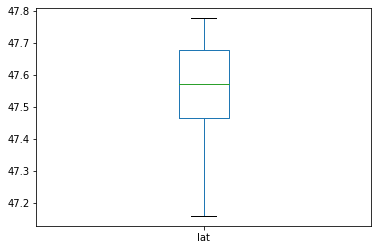

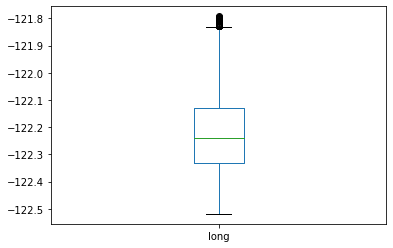

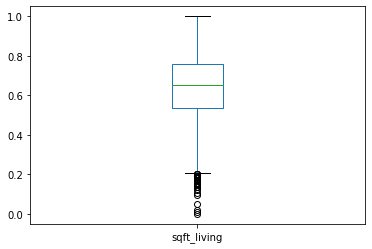

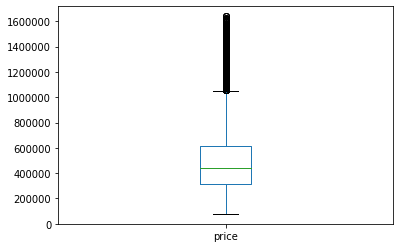

In [125]:
def explore_outliers_boxplot(column):
    """ Display boxplot for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Look for outliers on predictor column
    #
    #---------------------------------------------------------------------------------- 
    plt.figure()
    df[column].plot.box()
    
#for column in df:
explore_outliers_boxplot('grade')
explore_outliers_boxplot('waterfront')
explore_outliers_boxplot('bedrooms')
explore_outliers_boxplot('bathrooms')
explore_outliers_boxplot('lat')
explore_outliers_boxplot('long')
explore_outliers_boxplot('sqft_living')
explore_outliers_boxplot('price')

Explore Outliers with Box Plots
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------
Question:  Which variables show outliers in the box plot?
Those variables that display values on the box plot outside of the min/max and interquartile range.

Remove outliers to cut tails on data and normalise
Price has a number of outliers at the positive right tail but keeping and will acknowledge this in the non-technical presentation.

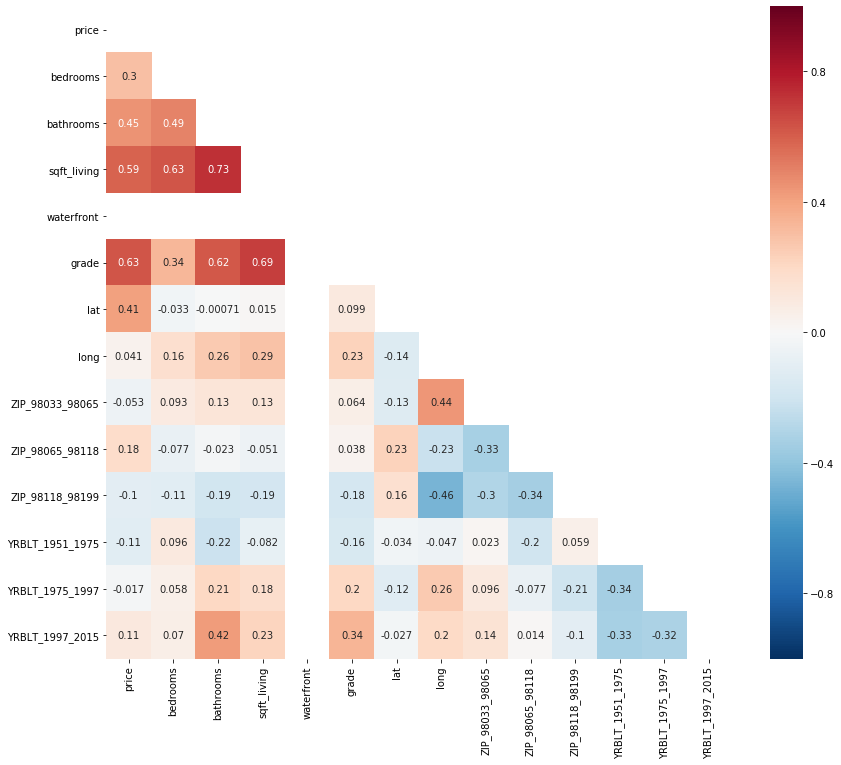

In [126]:
def explore_multicolinearity():
    """ Display multicolinearity graph for df
    Arguments:
        
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check for multi-colinearity 
    #
    #---------------------------------------------------------------------------------- 
    import seaborn as sns
    correlation = df.corr()
    plt.figure(figsize=(14, 12))
    mask = np.zeros_like(correlation, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    heatmap = sns.heatmap(correlation, mask=mask, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")
    abs(df.corr())>0.75
    
    
explore_multicolinearity()

Explore Multi Collinearity 
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------

Question:  Which variables have a higher correlation with target and each other?
Those variables that have larger than 0.75 relationship in the multi-collinearity graph.

price and sqft_living have a 0.7 collinearity - keep sqft_living as it has the highest correlation to price

sqft_above and grade have a 0.76 collinearity with each other - drop sqft_above as keeping sqft_living which is equal to sqft_basement + sqft_above

sqft_living and sqft_living_15 have a 0.76 collinearity - drop sqft_living_15 as preferred normalization of        sqft_living

sqft_living and sqft_above have a 0.88 collinearity - drop sqft_above as preferred normalization of sqft_living, also sqft_above + sqft_basement = sqft_living, drop sqft_basement

sqft_living and grade have a 0.76 collinearity - keeping grade out of further interest

sqft_living and bathrooms have a 0.76 collinearity - drop bathrooms, keep bedrooms as collinearity is only 0.58


In [127]:
#----------------------------------------------------------------------------------
#------------Run a simple regression in Statsmodels with price as target and column as a predictor
#
#---------------------------------------------------------------------------------- 
# build the formula 
f = 'price~sqft_living+grade+bedrooms+bathrooms+waterfront+lat'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
#Get Regression Diagnostics Summary
model.summary()

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5504.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:03:38   Log-Likelihood:            -2.7210e+05
No. Observations:               20331   AIC:                         5.442e+05
Df Residuals:                   20325   BIC:                         5.443e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.039e+07   3.75e+05    -80.986      0.000   -3.11e+07   -2.97e+07
sqft_living  5.691e+05   1.32e+04     43.201      0.000    5.43e+05    5.95e+05
grade        8.701e+04   1604.552     54.227      0.000    8.39e+04    9.02e+04
bedrooms    -6436.3438   1456.215     -4.420      0.000   -9290.644   -3582.044
bathrooms   -7647.9928   1664.713     -4.594      0.000   -1.09e+04   -4385.020
waterfront           0          0        nan        nan           0           0
lat          6.279e+05   7914.548     79.330      0.000    6.12e+05    6.43e+05
==============================================================================
Omnibus:                     5924.237   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21182.202
Skew:                           1.443   Prob(JB):                         0.00
Kurtosis:                       7.083   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Explore Simple Regression 
#----------------------------------------------------------------------------------
#------------ OBSERVATIONS
#----------------------------------------------------------------------------------

Kurtosis is high in first iteration (needs to be <=3)
Skew is less than 3 (needs to be <=3)
P value is low at 0
R Squared is above 5

Question:  What would be more towards an ideal regression result?
R-Squared > 0.6
Kurtosis < 3
Skew closer to 0

Consider stepwise selection and further removing outliers and tails to normalise the data.  Possibly removing outliers on price ?


# MODEL

#----------------------------------------------------------------------------------
#------------ Run a stepwise selection
#----------------------------------------------------------------------------------

In [128]:
# Perform stepwise selection
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [129]:
X = df
X = df.drop('price', axis=1)
y = pd.DataFrame(df, columns=['price'])

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  bathrooms                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  YRBLT_1975_1997                with p-value 3.61378e-120
Add  YRBLT_1997_2015                with p-value 6.9564e-284
Add  YRBLT_1951_1975                with p-value 5.52888e-305
Add  ZIP_98118_98199                with p-value 2.51284e-89
Add  ZIP_98033_98065                with p-value 2.05704e-17
Add  bedrooms                       with p-value 2.97459e-15
Add  long                           with p-value 1.26835e-07
resulting features:
['bathrooms', 'lat', 'sqft_living', 'grade', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']


In [130]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,-0.384188,-1.519320,0.465882,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,-0.384188,0.285530,0.778564,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,-1.551392,-1.519320,0.294403,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,0.783016,1.368441,0.669718,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,-0.384188,-0.075440,0.607795,0.0,8,47.6168,-122.045,0,1,0,0,1,0


In [131]:
#----------------------------------------------------------------------------------
#------------ Run a simple regression in Statsmodels with price as target and column(s) as a predictor(s)
#----------------------------------------------------------------------------------

In [132]:
# build the formula 

# initial trial without stepwise selection      
#f='price~grade+waterfront+sqft_living+bedrooms'
# cols_to_use = ['sqft_living', 'grade','YRBLT_1997_2015'] 
#r-squared = 0.462 / kurtosis = 5.364 / skew = 0.988
#cols_to_use =['grade', 'YRBLT_1997_2015', 'YRBLT_1975_1997', 'long', 'bathrooms', 'ZIP_98033_98065', 'YRBLT_1951_1975', 'ZIP_98065_98118', 'ZIP_98118_98199', 'bedrooms', 'sqft_living']
#r-squared = 0.559 / kurtosis = 6.125 / skew = 1.002
#cols_to_use =['grade', 'YRBLT_1997_2015', 'YRBLT_1975_1997', 'long', 'ZIP_98033_98065', 'YRBLT_1951_1975', 'ZIP_98065_98118', 'ZIP_98118_98199', 'bedrooms', 'sqft_living']
#r-squared = 0.553 / kurtosis = 6.089 / skew = 0.997
#cols_to_use =['grade', 'lat', 'YRBLT_1951_1975', 'bedrooms', 'sqft_living']
#r-squared = 0.575 / kurtosis = 7.121 / skew = 1.456
#f='price~grade+waterfront+sqft_living+bedrooms+lat'  #r-squared = 0.585 / kurtosis = 7.2 / skew = 1.423
#f='price~grade+waterfront+sqft_living+bedrooms+lat+bathrooms'  #r-squared = 0.586 / kurtosis = 7.195 / skew = 1.423
#f='price~grade+waterfront+sqft_living+bedrooms+lat+bathrooms+long'  #r-squared = 0.596 / kurtosis = 7.026 / skew = 1.42
#cols_to_use =['grade', 'YRBLT_1997_2015', 'bathrooms', 'sqft_living']
#r-squared = 0.454 / kurtosis = 5.354 / skew = 1.018
#these predictors have p-values < 0.5 in the results from stepwise selection

# use predictors recommended by stepwise selection  
cols_to_use =['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']


predictors = '+'.join(cols_to_use)
f = 'price~' +predictors


model = smf.ols(formula=f, data=df).fit()
#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3389.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:03:39   Log-Likelihood:            -2.7021e+05
No. Observations:               20331   AIC:                         5.405e+05
Df Residuals:                   20319   BIC:                         5.405e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.214e+07   1.27e+06    -25.357      0.000   -3.46e+07   -2.97e+07
bathrooms         2.65e+04   1707.473     15.517      0.000    2.31e+04    2.98e+04
grade            1.097e+05   1540.363     71.226      0.000    1.07e+05    1.13e+05
sqft_living      4.988e+05   1.23e+04     40.400      0.000    4.75e+05    5.23e+05
lat              5.298e+05   7522.093     70.431      0.000    5.15e+05    5.45e+05
YRBLT_1975_1997 -1.865e+05   3540.822    -52.673      0.000   -1.93e+05    -1.8e+05
YRBLT_1997_2015 -1.876e+05   3805.932    -49.292      0.000   -1.95e+05    -1.8e+05
YRBLT_1951_1975 -1.063e+05   2980.182    -35.679      0.000   -1.12e+05      -1e+05
ZIP_98118_98199 -6.106e+04   2739.699    -22.287      0.000   -6.64e+04   -5.57e+04
ZIP_98033_98065 -1.761e+04   2718.049     -6.477      0.000   -2.29e+04   -1.23e+04
bedrooms        -1.084e+04   1357.284     -7.986      0.000   -1.35e+04   -8179.150
long            -5.258e+04   9948.141     -5.285      0.000   -7.21e+04   -3.31e+04
==============================================================================
Omnibus:                     5537.907   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21725.790
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       7.332   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
model.params.round()

Intercept         -32141910.0
bathrooms             26495.0
grade                109714.0
sqft_living          498777.0
lat                  529788.0
YRBLT_1975_1997     -186507.0
YRBLT_1997_2015     -187602.0
YRBLT_1951_1975     -106329.0
ZIP_98118_98199      -61059.0
ZIP_98033_98065      -17605.0
bedrooms             -10840.0
long                 -52578.0
dtype: float64

Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


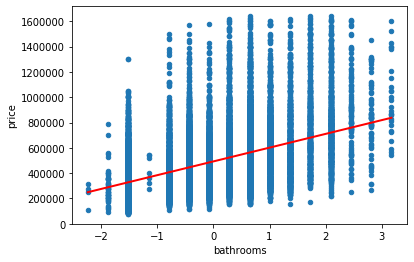

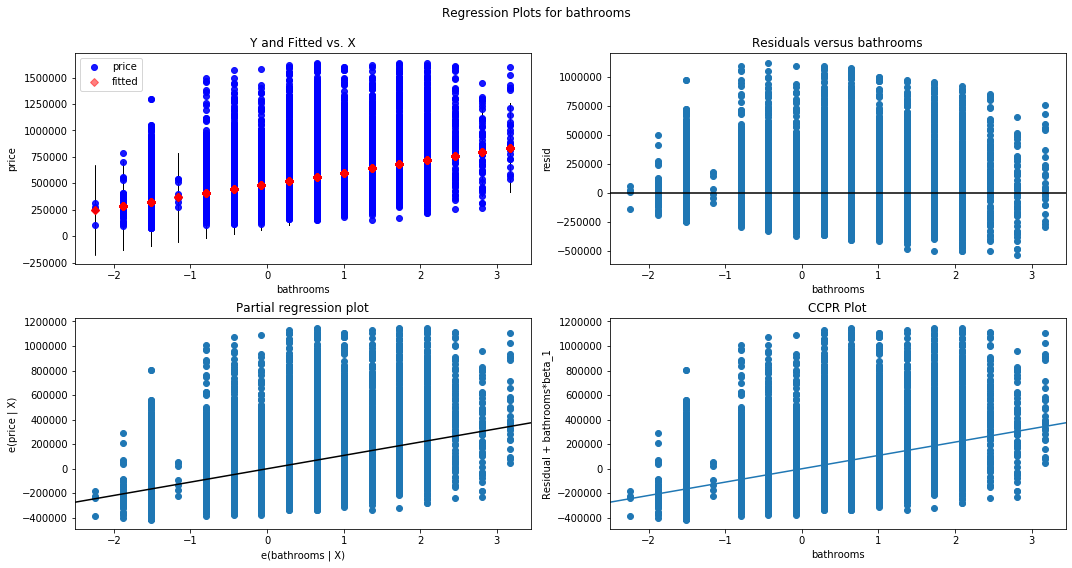

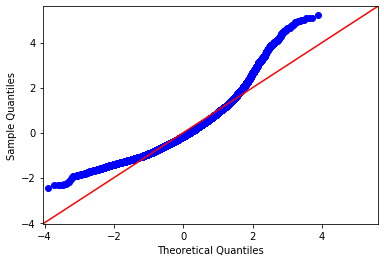

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~grade
-------------------------------------------------------------------------------------


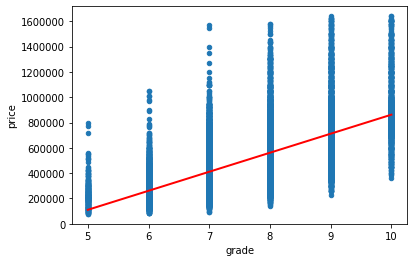

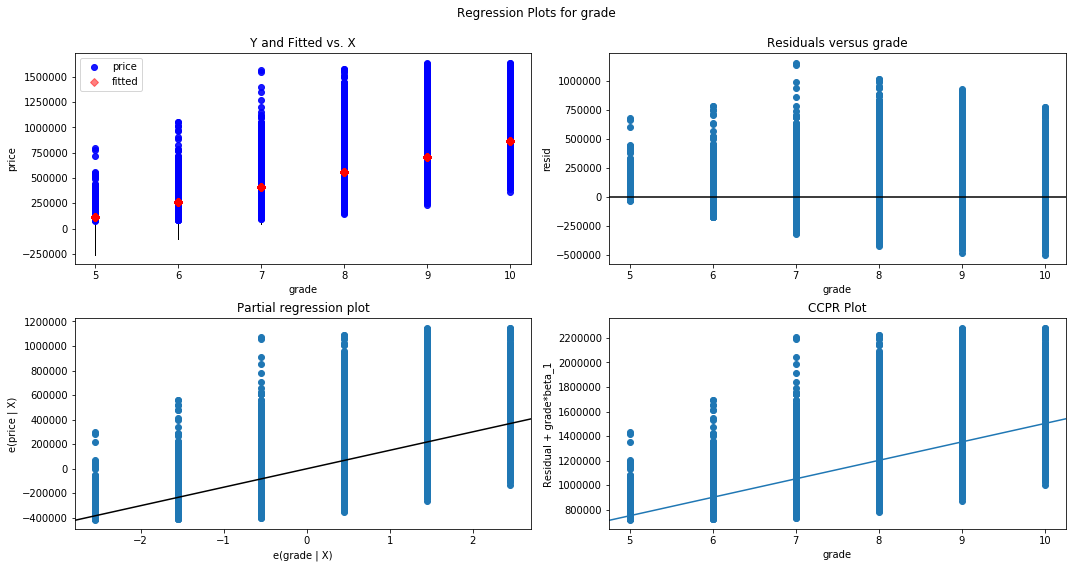

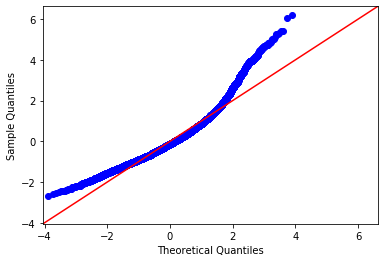

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


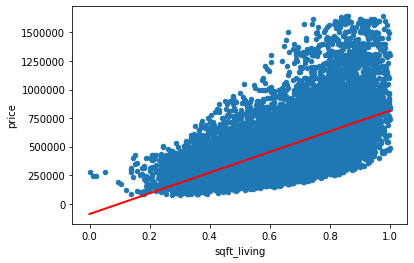

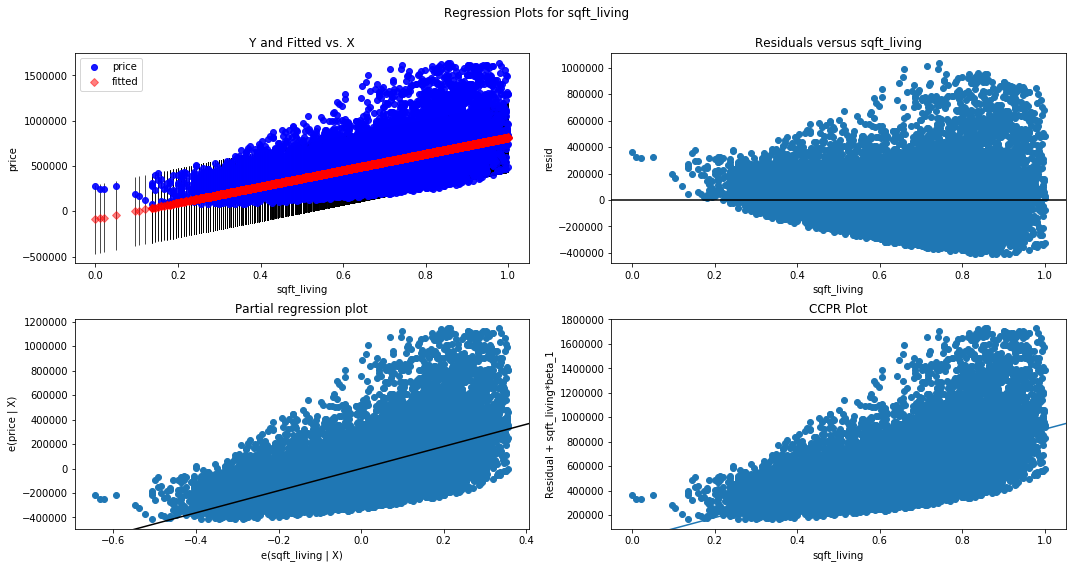

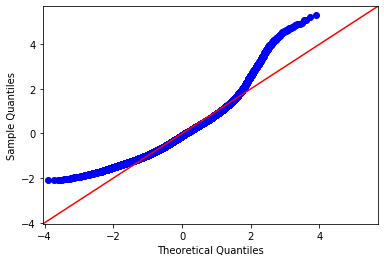

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~lat
-------------------------------------------------------------------------------------


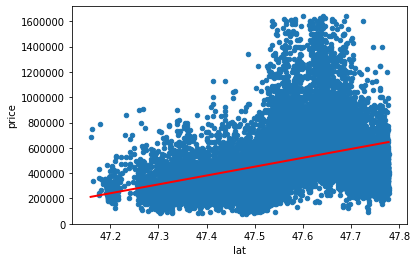

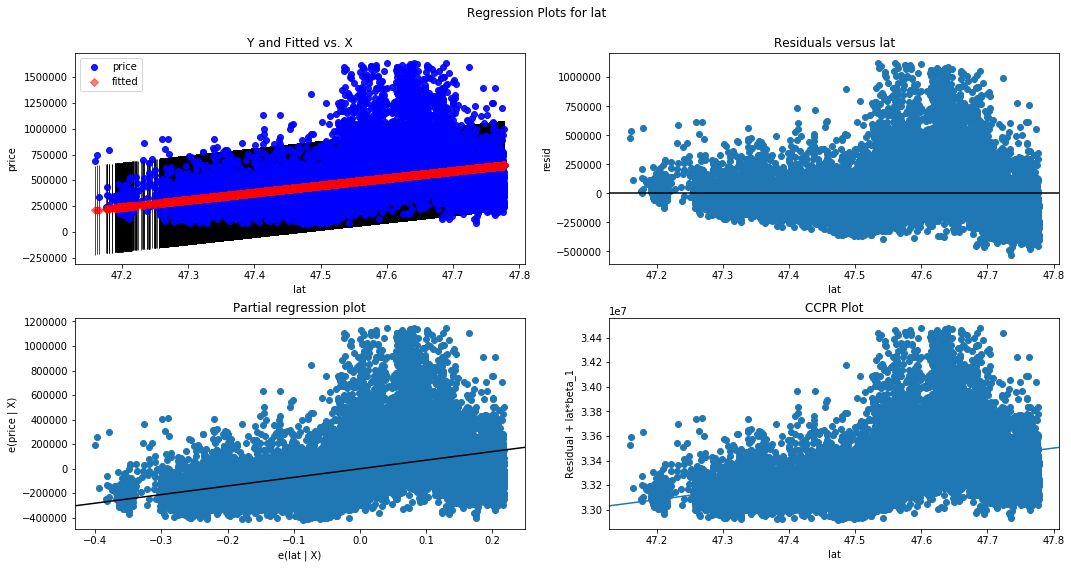

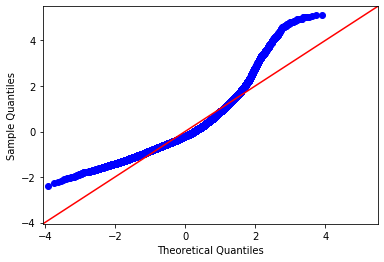

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~YRBLT_1975_1997
-------------------------------------------------------------------------------------


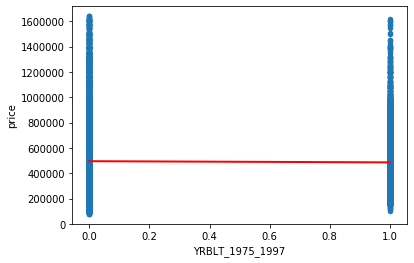

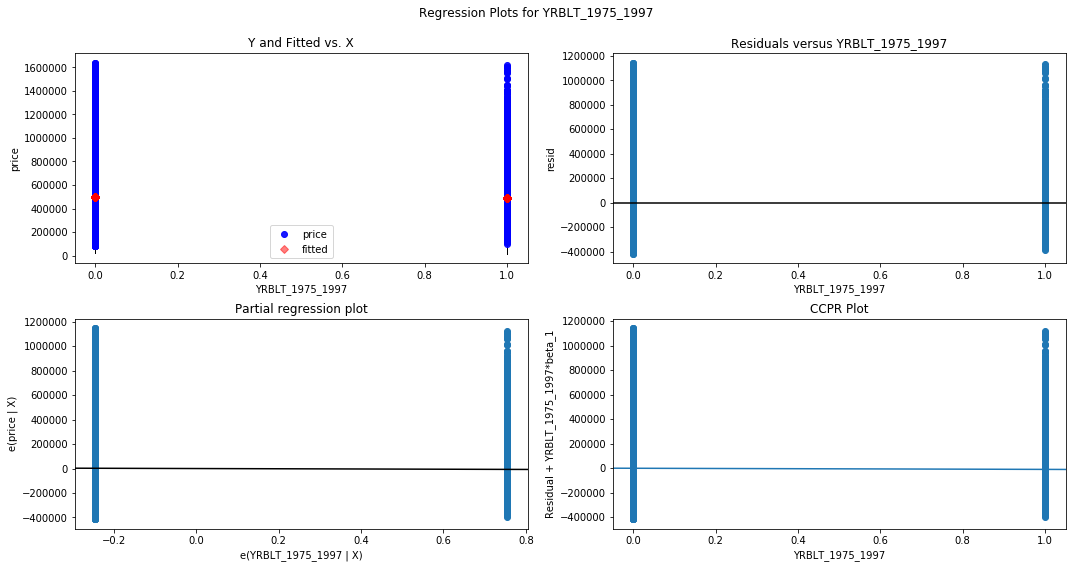

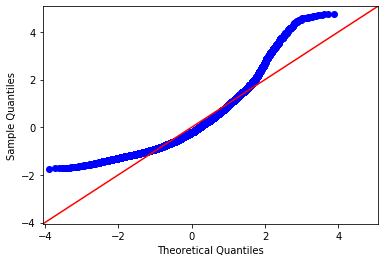

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~YRBLT_1997_2015
-------------------------------------------------------------------------------------


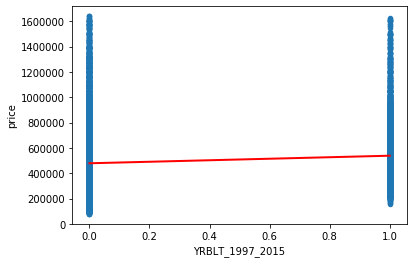

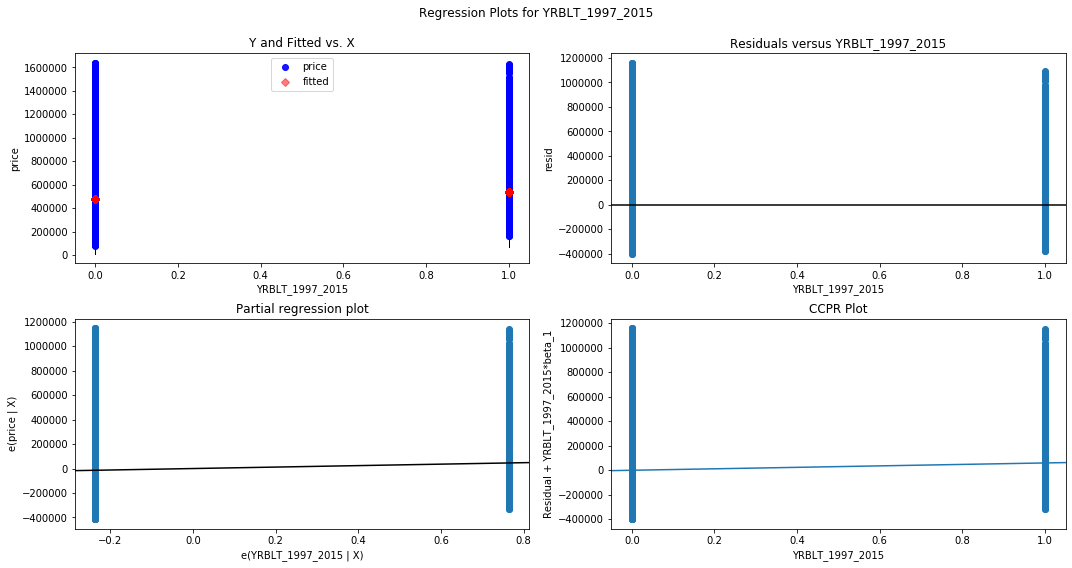

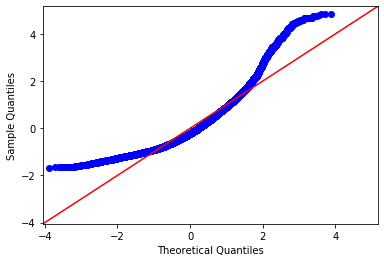

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~YRBLT_1951_1975
-------------------------------------------------------------------------------------


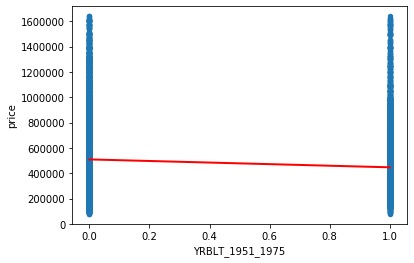

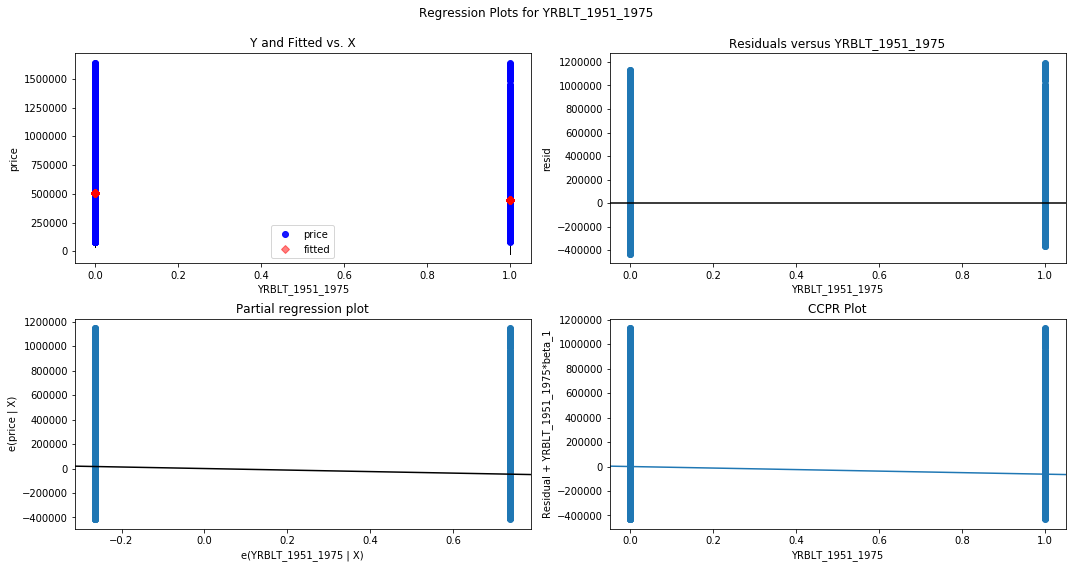

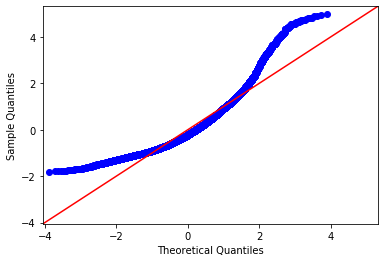

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~ZIP_98118_98199
-------------------------------------------------------------------------------------


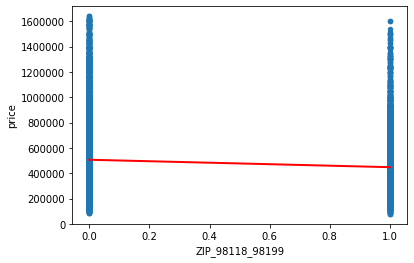

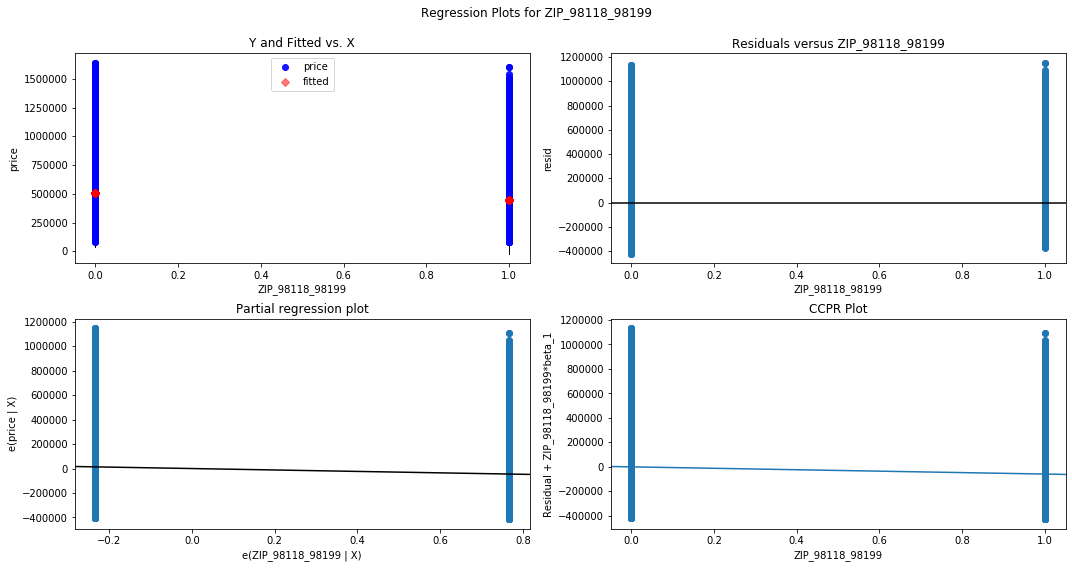

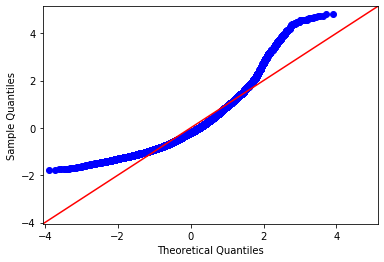

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~ZIP_98033_98065
-------------------------------------------------------------------------------------


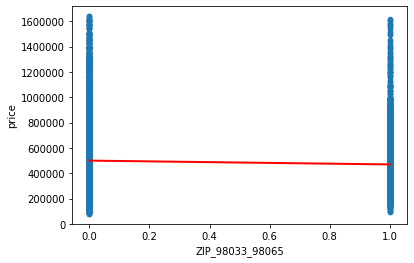

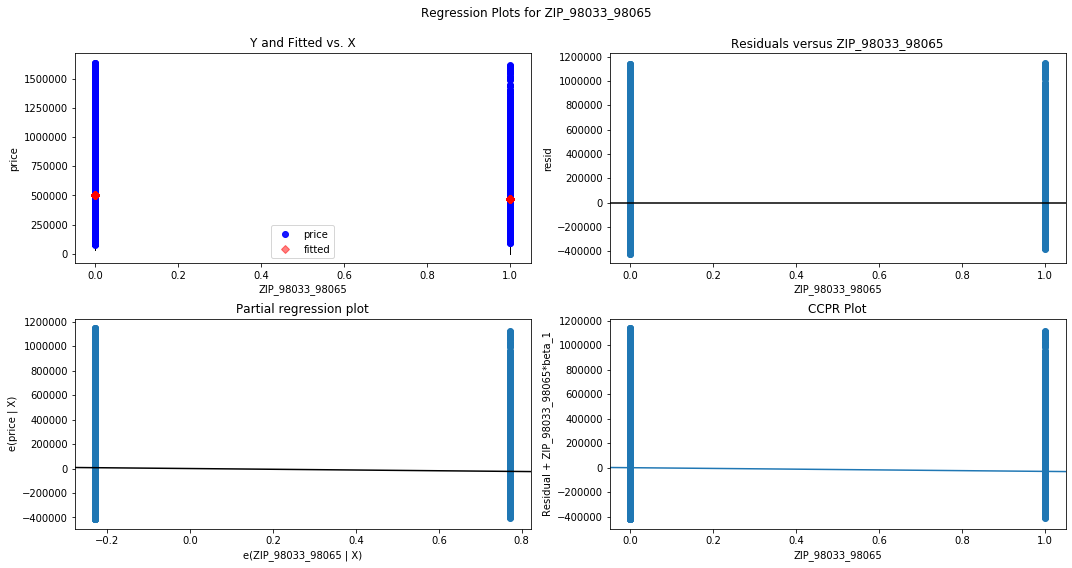

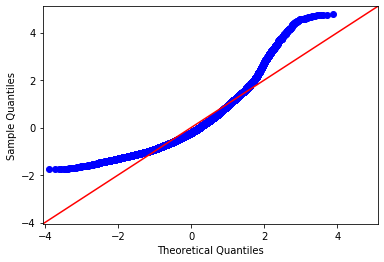

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


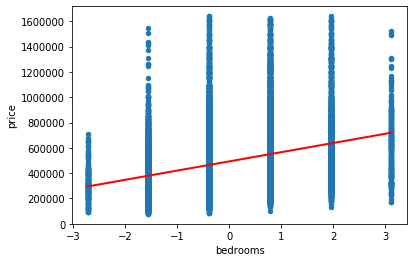

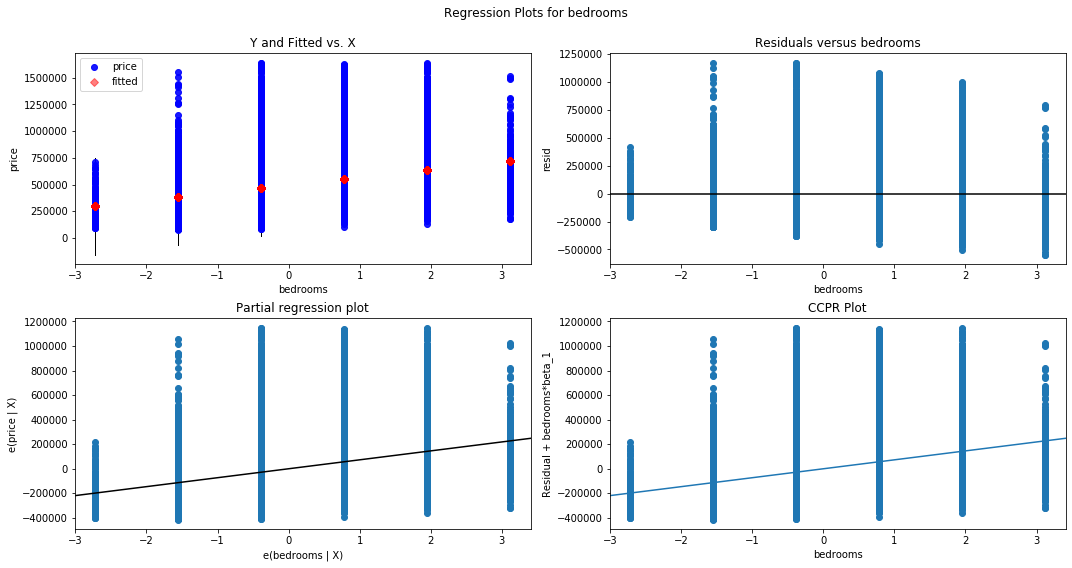

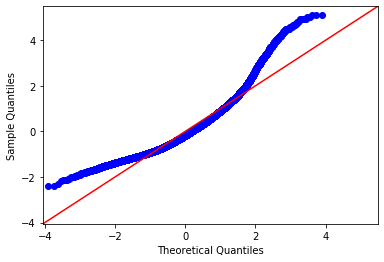

Press Enter to continue...
Regression Analysis and Diagnostics for formula: price~long
-------------------------------------------------------------------------------------


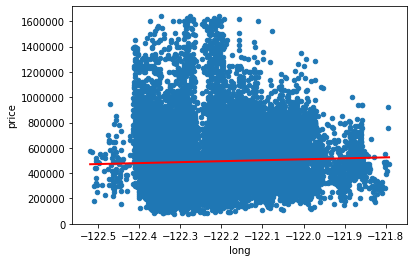

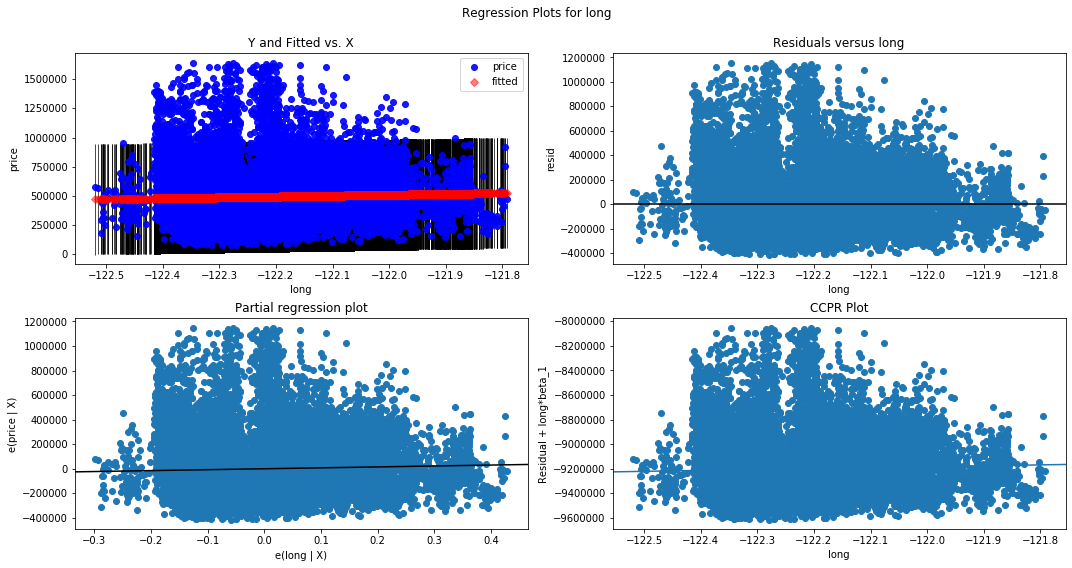

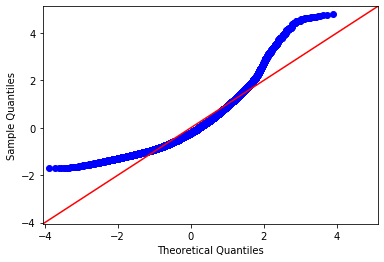

Press Enter to continue...


In [136]:
# import libraries
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import statsmodels.stats.api as sms

# Run a simple OLS regression between independent and dependent variables
# Plot a regression line on the scatter plots
# Plot the residuals using sm.graphics.plot_regress_exog()
# Plot a Q-Q plot for regression residuals normality test
# Store following values in array for each iteration:
# Independent Variable
# r_squared'
# intercept'
# 'slope'
# 'p-value'
# 'normality (JB)'
# Comment on each output

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']):
    print ("Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

#----------------------------------------------------------------------------------
#------------ Train Test Model
#----------------------------------------------------------------------------------

In [137]:
X = df[['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']]
y = pd.DataFrame(df.price, columns = ['price'])
type(X)

pandas.core.frame.DataFrame

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [140]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16264 4067 16264 4067


In [141]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

20777343743.326374

In [143]:
def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [144]:
df_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [145]:
df_folds = kfolds(df_data, 5)

In [146]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(df_folds) if i!=n])
    test = df_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')

In [ ]:
cv_5_results

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', np.sqrt(train_mse))
print('Test Mean Squared Error:', np.sqrt(test_mse))
print('difference: ' + str(np.round(abs(np.sqrt(train_mse)-np.sqrt(test_mse)),2)) )

#----------------------------------------------------------------------------------
#------------ OBSERVATIONS - General Overview after Train Test
#----------------------------------------------------------------------------------

# iNTERPRET

-----------Predictors with P - Values below 0.05
The predictors with p-value less than the significance level of 0.05 were added to the model.
This sample data provides enough evidence to reject the null hypothesis for the entire population. 
This data favors the hypothesis that there is a non-zero correlation. 
Changes in the independent variable are associated with changes in the response at 
the population level. These variables are statistically significant and probably a worthwhile 
addition to the regression model.

----------Predictors with P - Values above 0.05
The resulting featurs from stepwise selection with a p-value that is greater than the significance level 
indicates that there is insufficient evidence in the sample to conclude that a non-zero correlation exists.
They were hence not added to the list of model predictors for the model.

------------R-squared:	0.647
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 100% indicates that the model explains all the variability of the response data around its mean.  This model currently represents a 64.7% fit towards the regression line.

------------Skew:	1.312	
Skew measures the lack of symmetry in data distribution. A symmetrical distribution will have a skewness of 0. There are two types of Skewness: Positive and Negative. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.  In this case, the tail is positively skewed to the right.  I recommend that the tails be further normalised for the predictor
values in order to reduce the skew of this model towards 0.

------------Kurtosis:  7.332
Like skewness, kurtosis is a statistical measure that is used to describe the distribution. Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.  I recommend that the tails be further normalised for the predictor values in order to reduce the kurtosis of this model towards below 3.

------------Intercept:  -32141910.0
The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning.  Hence in this case, if there were no bathrooms, grade, sqft_living or latitude, there would be no physical property and hence no or a negetive price.

------------Predictor Co-efficient with + positive Values
In finding a positive relationship in increase in price with the predictor, I will propose focusing on these predictor values in the non-technical presentation.

--bathrooms             26495.0
For each increase in independant variable x value of bathroom added to the house, the dependent variable y price would increase by 26495.0

grade                109714.0
For each increase in independant variable x value of grade added to the house, the dependent variable y price would increase by 109714.0

sqft_living          498777.0
For each increase independant variable x value of sqft_living added to the house, the dependent variable y price would increase by 498777.0

lat                  529788.0
For each increase in independant variable x value of lat added to the house, the dependent variable y price would increase by 529788.0

------------Predictor Co-efficient with - negative Values
For the purposes of this project, in finding a positive relationship in increase in price with the predictor values, I will not be presenting these values for the non-technical presentation:

YRBLT_1975_1997     -186507.0
YRBLT_1997_2015     -187602.0
YRBLT_1951_1975     -106329.0
ZIP_98118_98199      -61059.0
ZIP_98033_98065      -17605.0
bedrooms             -10840.0
long                 -52578.0



-----------------------------

Notes from project requirements (to be discussed)
Assessing the model:

Assess parameters(slope,intercept)

Check if the model explains the variation in the data (RMSE, F, R_square)

Are the coeffs, slopes, intercepts in appropriate units?

Whats the impact of collinearity? Can we ignore? 

Interpret final model and draw >=3 conclusions and recommendations from dataset

Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. 

All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)

You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.

Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.


Extra attachments to this notebook:
Readme files
Blog post
Video
.pdf presentation for non technical
45 minute technical interview

4 recommendations for home owner  - what increases house prices the most

-----------------------------------------------------------------------------

# CONCLUSIONS & RECOMMENDATIONS

#----------------------------------------------------------------------------------
#------------ Explore data for interesting extra q/a to present to non technical
#----------------------------------------------------------------------------------

In [ ]:
# Which year, month, day have the most sales?
df = pd.read_csv('kc_house_data.csv')  #Load the data fresh again
display(df.head())
df.info()

df["price"].groupby(df["date"].dt.year).count().plot(kind="bar")
df["price"].groupby(df["date"].dt.month).count().plot(kind="bar")
df["price"].groupby(df["date"].dt.day).count().plot(kind="bar")

# Drop the date coloumn as pandas does not like to work with it in plotting, numeric is required
df = df.drop(["date"], axis=1)

# How many sales were on the waterfront
df["price"].groupby(df["waterfront"]).count().plot(kind="bar")

# Sales by number of bedrooms 
df["price"].groupby(df["bedrooms"]).count().plot(kind="bar")

# Sales by number of bathrooms 
df["price"].groupby(df["bathrooms"]).count().plot(kind="bar")

# Sales by number of grade 
df["price"].groupby(df["grade"]).count().plot(kind="bar")

#Sales by year built
df["price"].groupby(df["yr_built"]).count().plot(kind="bar")

#Sales by view
df["price"].groupby(df["view"]).count().plot(kind="bar")

#Sales by grade
df["price"].groupby(df["grade"]).count().plot(kind="bar")

#Sales by condition
df["price"].groupby(df["condition"]).count().plot(kind="bar")

#Sales by floors
df["price"].groupby(df["floors"]).count().plot(kind="bar")